In [1]:
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

In [2]:
@dataclass
class ModelInputs:
    start_salary: int = 60000
    promos_every_n_year : int = 5
    cost_o_living_raise :float = 0.02
    promo_rise: float = 0.15
    savings_rate: float = 0.25
    interest_rate: float = 0.05
    Desired_cash: int = 1500000

model_data = ModelInputs()
model_data      

ModelInputs(start_salary=60000, promos_every_n_year=5, cost_o_living_raise=0.02, promo_rise=0.15, savings_rate=0.25, interest_rate=0.05, Desired_cash=1500000)

In [3]:
def years_to_retirement(model_data: ModelInputs,print_output=False):
    
    # starting with no cash saved
    data=model_data
    prior_wealth = 0  
    wealth = 0
    
    year = 0  # will become 1 on first loop
    
    def wealth_at_year(data,year,prior_wealth):
        cash_saved = cash_saved_during_year(data,year)
        wealth = prior_wealth*(1 + data.interest_rate) + cash_saved
        return wealth
    
    def cash_saved_during_year(model_data,year):
        salary= salary_at_year(model_data,year)
        cash_saved=salary*model_data.savings_rate
        return cash_saved
    
    def salary_at_year(data: ModelInputs, year):
        # Every n years we have a promotion, so dividing the years and taking out the decimals gets the number of promotions
        num_promos = int(year / data.promos_every_n_year)
        
        # This is the formula above implemented in Python
        salary_t = data.start_salary * (1 + data.cost_o_living_raise) ** year * (1 + data.promo_rise) ** num_promos
        return salary_t

    if print_output:
        print('Wealths over time:') # \n makes a blank line in the output.
    while wealth < data.Desired_cash:
        year = year + 1
        wealth = wealth_at_year(model_data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is ${wealth:,.0f}.')
        # Set next year's prior wealth to this year's wealth
        prior_wealth = wealth
        
    # Now we have exited the while loop, so wealth must be >= desired_cash. Whatever last year was set
    # is the years to retirement.
    if print_output:
        print(f'\nRetirement:\nIt will take {year} years to retire.')  # \n makes a blank line in the output.
    return year
years = years_to_retirement(model_data,print_output=True)

Wealths over time:
The wealth at year 1 is $15,300.
The wealth at year 2 is $31,671.
The wealth at year 3 is $49,173.
The wealth at year 4 is $67,868.
The wealth at year 5 is $90,307.
The wealth at year 6 is $114,248.
The wealth at year 7 is $139,775.
The wealth at year 8 is $166,975.
The wealth at year 9 is $195,939.
The wealth at year 10 is $229,918.
The wealth at year 11 is $266,080.
The wealth at year 12 is $304,542.
The wealth at year 13 is $345,431.
The wealth at year 14 is $388,878.
The wealth at year 15 is $439,025.
The wealth at year 16 is $492,294.
The wealth at year 17 is $548,853.
The wealth at year 18 is $608,878.
The wealth at year 19 is $672,557.
The wealth at year 20 is $745,168.
The wealth at year 21 is $822,190.
The wealth at year 22 is $903,859.
The wealth at year 23 is $990,422.
The wealth at year 24 is $1,082,140.
The wealth at year 25 is $1,185,745.
The wealth at year 26 is $1,295,520.
The wealth at year 27 is $1,411,793.
The wealth at year 28 is $1,534,910.

Reti

In [4]:
years = years_to_retirement(model_data)
years

28

In [5]:
#Sensitivity Analysis
def years_to_retirement_separate_args(**kwargs):
    print(kwargs)
    data=ModelInputs(**kwargs)
    return years_to_retirement(data)
years_to_retirement_separate_args(start_salary=10000,promo_rise=0.7)

{'start_salary': 10000, 'promo_rise': 0.7}


33

In [6]:
#Sensitivity Analysis
def years_to_retirement_separate_args(**kwargs):
    data=ModelInputs(**kwargs)
    return years_to_retirement(data)
years_to_retirement_separate_args(start_salary=10000,promo_rise=0.7)

33

In [7]:
sensitivity_values={
    'start_salary':[40000,120000],
    'interest_rate':[0.03,0.1]
}
sa=SensitivityAnalyzer(sensitivity_values,years_to_retirement_separate_args)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 799.03it/s]


In [8]:
sa.df

,start_salary,interest_rate,Result
0,40000,0.03,37
1,40000,0.1,26
2,120000,0.03,23
3,120000,0.1,17


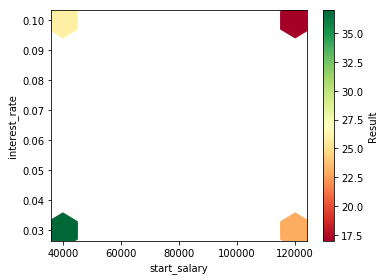

In [9]:
plot=sa.plot()

In [10]:
styled_dict=sa.styled_dfs()

,0.03,0.1
start_salary,,
40000,37.000000,26.000000
120000,23.000000,17.000000


In [11]:
sensitivity_values={
    'start_salary':[40000,120000],
    'interest_rate':[0.03,0.1]
}
sa=SensitivityAnalyzer(sensitivity_values,
                       years_to_retirement_separate_args,
                       result_name='Years to Retirement',
                       reverse_colors=True,
                       grid_size=3)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 998.76it/s]


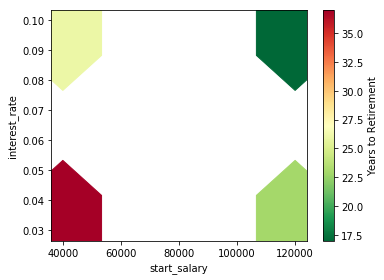

In [12]:
plot=sa.plot()

In [13]:
styled_dict=sa.styled_dfs()

,0.03,0.1
start_salary,,
40000,37.000000,26.000000
120000,23.000000,17.000000


In [14]:
[i for i in range (4,8)]

[4, 5, 6, 7]

In [15]:
[i*10000 for i in range (4,8)]

[40000, 50000, 60000, 70000]

In [16]:
[i/100 for i in range(3,7)]

[0.03, 0.04, 0.05, 0.06]

In [17]:
sensivity_values = {
    'start_salary': [i*10000 for i in range(4,8)],
    'interest_rate': [i/100 for i in range(4,8)],
    'promos_every_n_year':[i for i in range(1,4)],
    'cost_o_living_raise':[i/100 for i in range(1,4)],
    'promo_rise':[i/100 for i in range(10,40,10)],
    'savings_rate':[i/100 for i in range(10,40,10)],
    'Desired_cash': [i*100000 for i in range(10,26,10)]

}
labels ={
    "start_salary":"Starting Salary",
    "interest_rate":"Interest Rate",
    "promos_every_n_year":"Promotion",
    "cost_o_living_raise" :"Cost of living",
    "interest_rate":"Interest Rate",
}
sa = SensitivityAnalyzer(sensivity_values,years_to_retirement_separate_args,result_name='Years to retirement',reverse_colors=True,labels=labels,num_fmt='{:.0f}')

100%|█████████████████████████████████████████████████████████████████████████████| 2592/2592 [00:02<00:00, 934.15it/s]


In [18]:
sa.df

,Starting Salary,Interest Rate,Promotion,Cost of living,promo_rise,savings_rate,Desired_cash,Years to retirement
0,40000,0.04,1,0.01,0.1,0.1,1000000,28
1,40000,0.04,1,0.01,0.1,0.1,2000000,34
2,40000,0.04,1,0.01,0.1,0.2,1000000,23
3,40000,0.04,1,0.01,0.1,0.2,2000000,28
4,40000,0.04,1,0.01,0.1,0.3,1000000,20
...,...,...,...,...,...,...,...,...
2587,70000,0.07,3,0.03,0.3,0.1,2000000,26
2588,70000,0.07,3,0.03,0.3,0.2,1000000,17
2589,70000,0.07,3,0.03,0.3,0.2,2000000,21
2590,70000,0.07,3,0.03,0.3,0.3,1000000,14


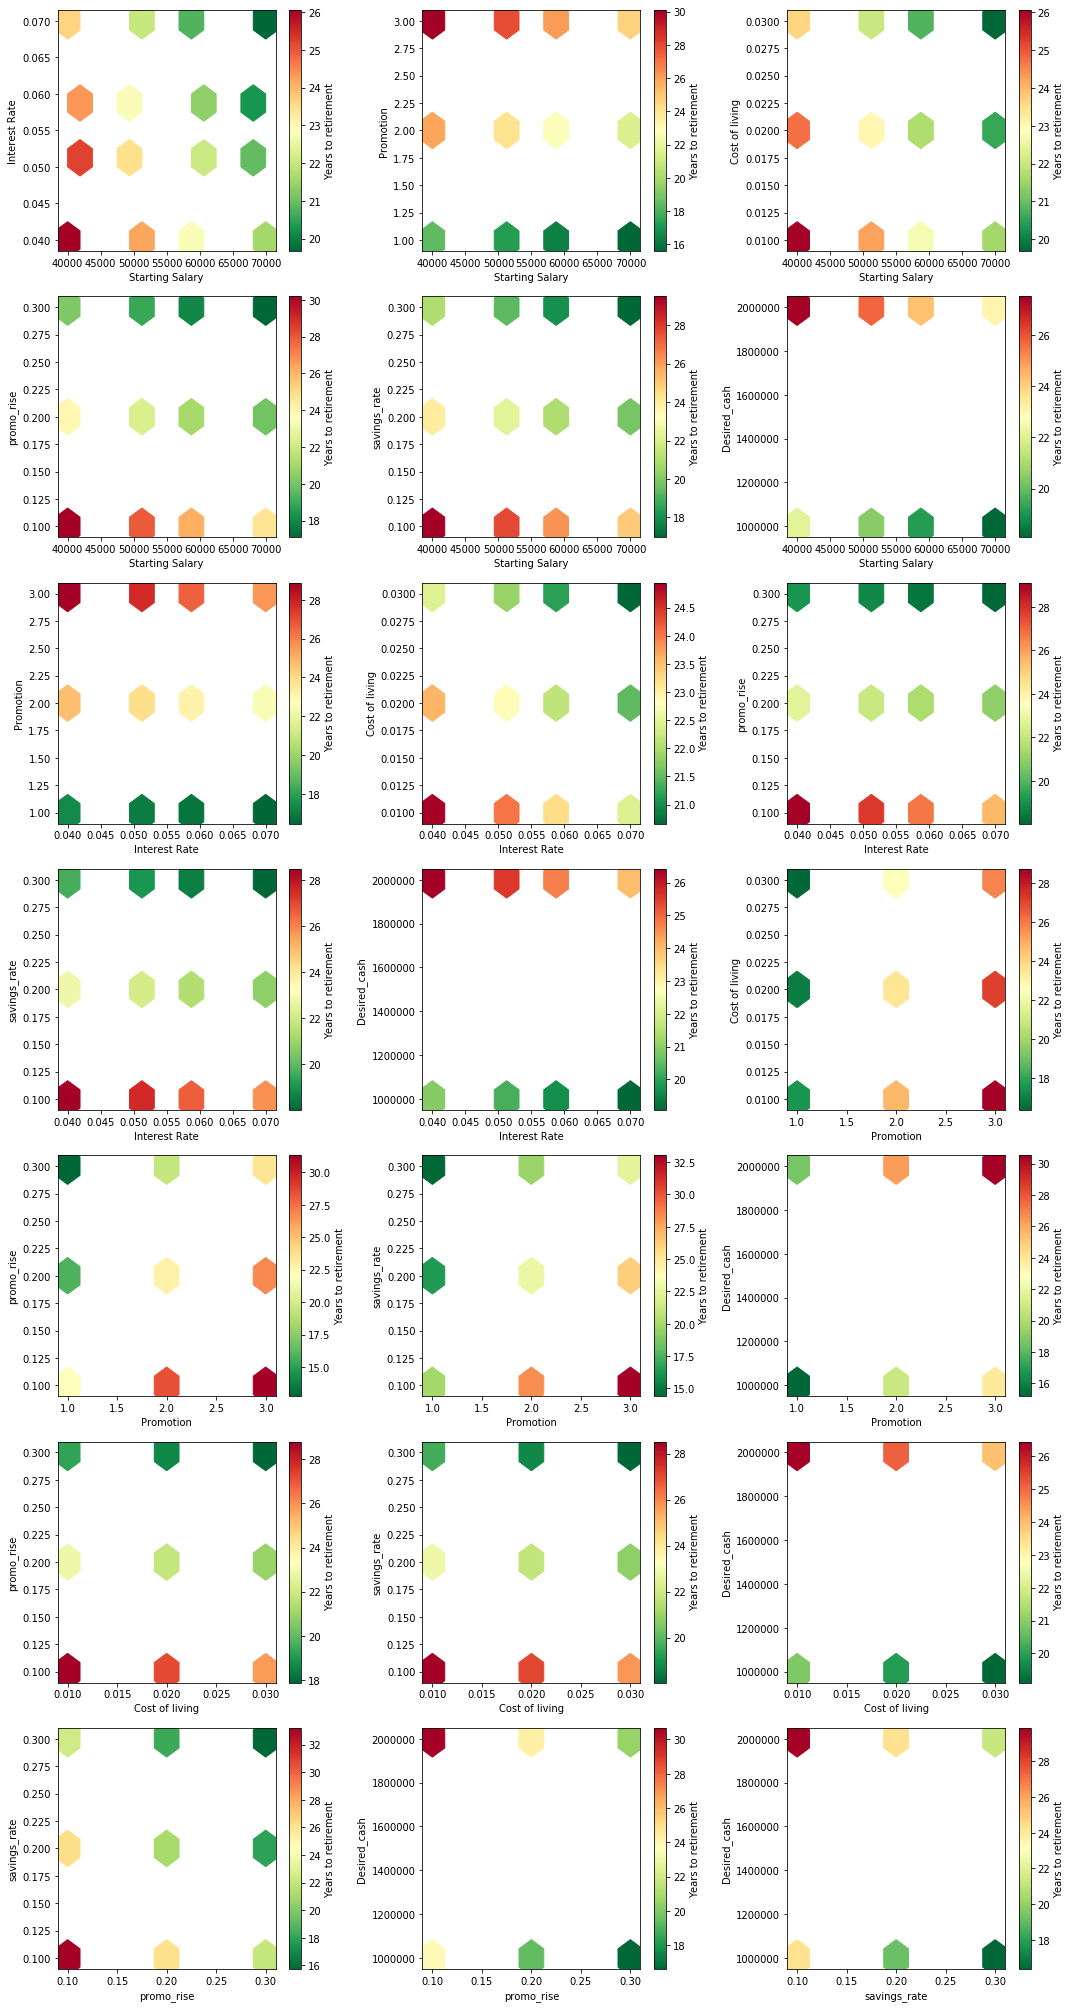

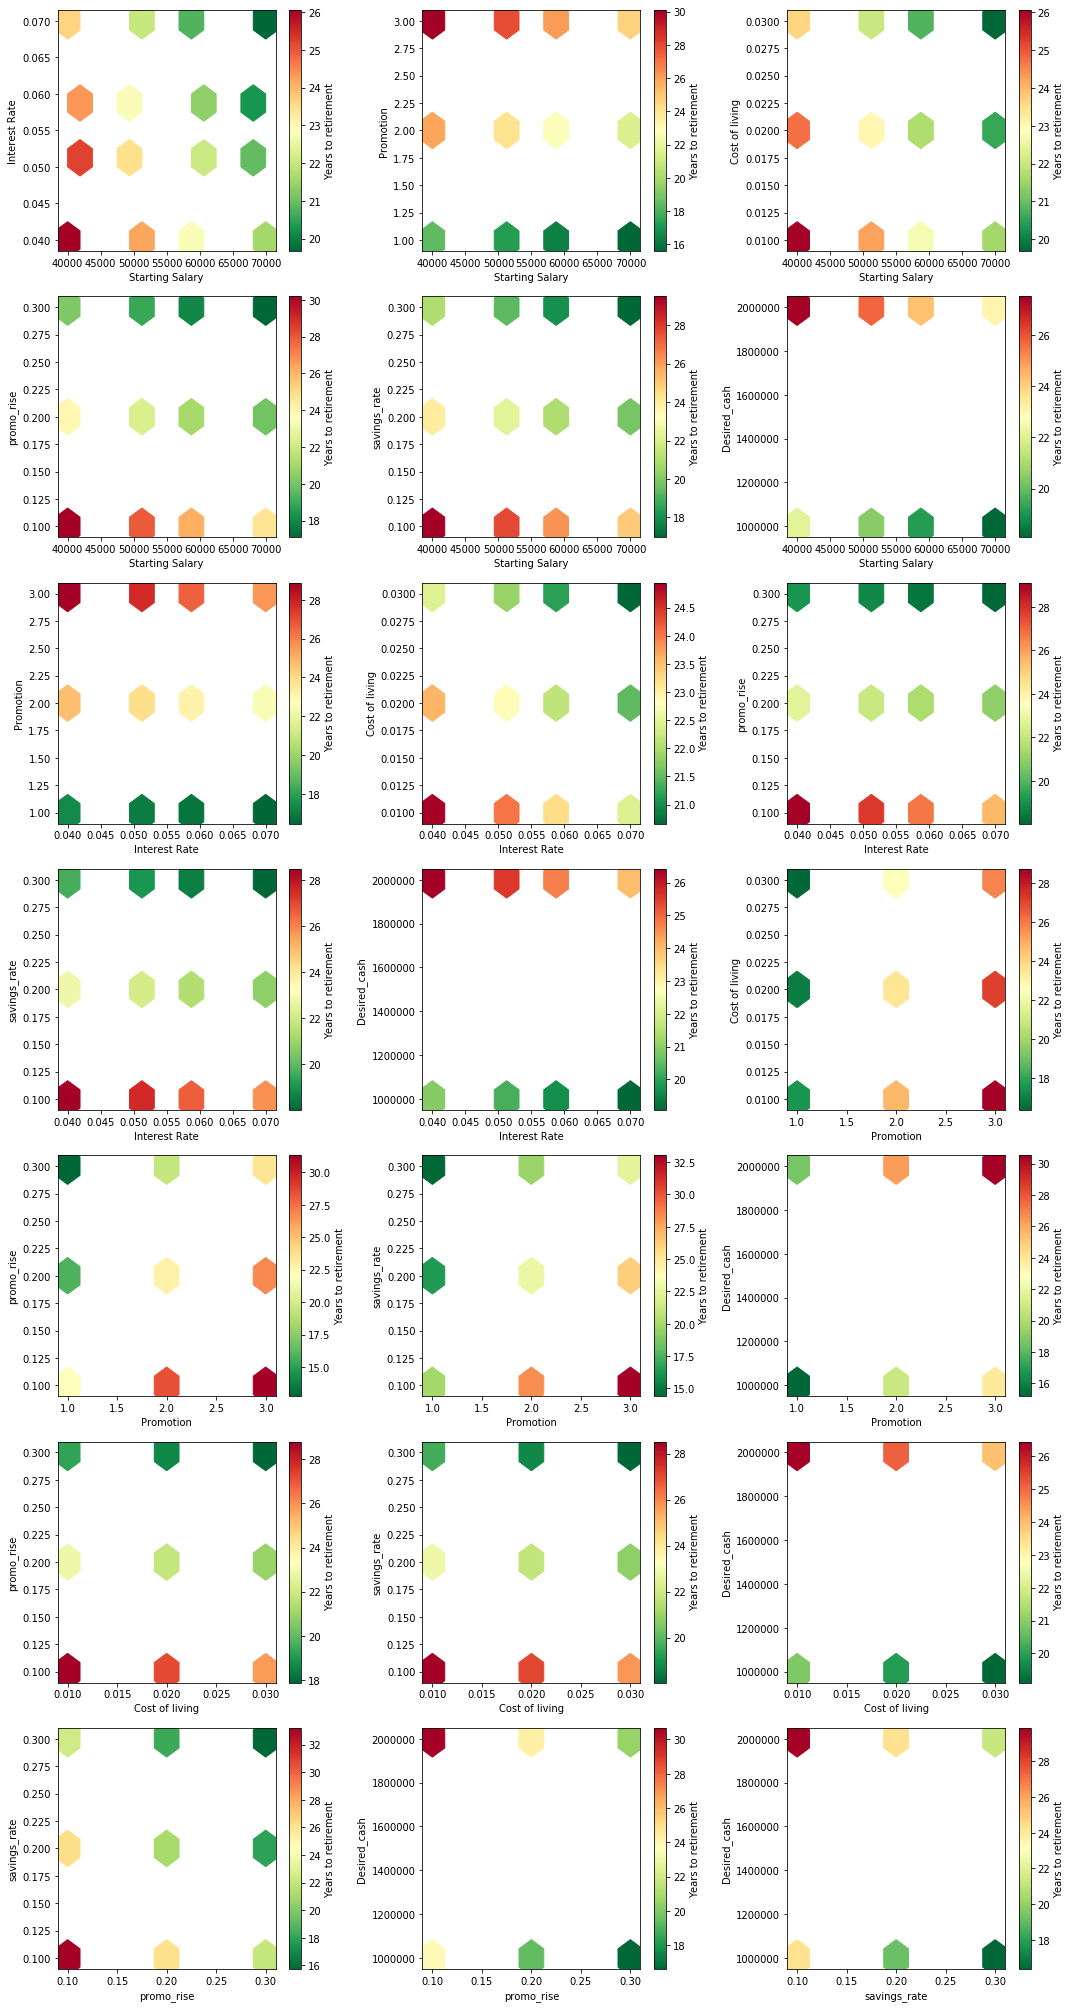

In [19]:
sa.plot()

In [20]:
styled_dict =sa.styled_dfs()

,0.04,0.05,0.06,0.07
Starting Salary,,,,
40000,26,25,24,24
50000,24,23,23,22
60000,23,22,21,21
70000,22,21,20,20


,1,2,3
Starting Salary,,,
40000,18,26,30
50000,17,24,28
60000,16,23,26
70000,16,22,25


,0.01,0.02,0.03
Starting Salary,,,
40000,26,25,24
50000,24,23,22
60000,23,22,21
70000,22,21,20


,0.1,0.2,0.3
Starting Salary,,,
40000,30,24,20
50000,28,22,19
60000,26,21,18
70000,25,20,17


,0.1,0.2,0.3
Starting Salary,,,
40000,30,24,21
50000,28,22,19
60000,26,21,18
70000,25,20,17


,1000000,2000000
Starting Salary,,
40000,22,28
50000,20,26
60000,19,24
70000,18,23


,1,2,3
Interest Rate,,,
0.04,17,25,29
0.05,17,24,28
0.06,17,23,27
0.07,16,22,26


,0.01,0.02,0.03
Interest Rate,,,
0.04,25,24,22
0.05,24,23,22
0.06,23,22,21
0.07,22,21,21


,0.1,0.2,0.3
Interest Rate,,,
0.04,29,23,19
0.05,28,22,19
0.06,27,22,18
0.07,26,21,18


,0.1,0.2,0.3
Interest Rate,,,
0.04,28,23,20
0.05,28,22,19
0.06,27,21,19
0.07,26,21,18


,1000000,2000000
Interest Rate,,
0.04,21,26
0.05,20,26
0.06,20,25
0.07,19,24


,0.01,0.02,0.03
Promotion,,,
1,18,17,16
2,25,24,22
3,29,27,26


,0.1,0.2,0.3
Promotion,,,
1,22,16,13
2,28,23,19
3,31,27,24


,0.1,0.2,0.3
Promotion,,,
1,20,16,14
2,28,23,20
3,33,26,22


,1000000,2000000
Promotion,,
1,15,19
2,21,26
3,24,31


,0.1,0.2,0.3
Cost of living,,,
0.01,29,23,19
0.02,27,22,19
0.03,26,21,18


,0.1,0.2,0.3
Cost of living,,,
0.01,29,23,20
0.02,27,22,19
0.03,26,21,18


,1000000,2000000
Cost of living,,
0.01,21,26
0.02,20,25
0.03,19,24


,0.1,0.2,0.3
promo_rise,,,
0.1,33,26,22
0.2,26,21,18
0.3,22,18,16


,1000000,2000000
promo_rise,,
0.1,24,31
0.2,19,24
0.3,17,21


,1000000,2000000
savings_rate,,
0.1,24,30
0.2,19,24
0.3,16,21
